In [5]:
import numpy as np
import pandas as pd

filename='credit_card_data.xls'
xls = pd.ExcelFile(filename)
cc_data = xls.parse(0)
cc_data.columns=cc_data.iloc[0]
cc_data=cc_data.drop([0])

In [6]:
cc_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [50]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split

from ast import literal_eval

def adj_r2(r2, n, p):
    return 1-(1-r2)*(n-1)/(n-p-1)

def forward_regr(X,y,test_size,verbose=True):
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=test_size)

    model=pd.DataFrame([])
    predictors=list(X_train.columns)
    optimal_predictors={}

    for k in range(0,len(predictors)):
        if verbose:
            print('===============================================')
            print(f'{k}th iteration')
        R2_list={}
        for p in predictors:
            test_model=model.copy()
            test_model[p]=X_train[p]

            log_regr=LinearRegression().fit(test_model, y_train)
            y_pred = log_regr.predict(X_test[test_model.columns])

            R2_val=r2_score(y_test, y_pred)
            R2_list.update({p:R2_val})

        key=max(R2_list, key=R2_list.get)
        model[key]=X_train[key]
        predictors.remove(key)

        adjusted_R2=adj_r2(R2_list[key],X_train.shape[0],X_train.shape[1])
        optimal_predictors.update({repr(list(model.columns)):adjusted_R2})

        if verbose:
            print('params:',list(model.columns))
            print('added key:',key)
            print(' ')
            print('Optimal feature of linear regression:',key)
            print('r^2 value=', R2_list[key])
            print('adj r^2 value=', adjusted_R2)

    optimal_predictors = sorted(optimal_predictors,key=optimal_predictors.get,reverse=True)
    return [ literal_eval(x) for x in optimal_predictors]


def backward_regr(X,y,test_size,verbose=True):
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=test_size)

    model=X_train.copy()
    predictors=list(X_train.columns)
    optimal_predictors={}

    for k in range(0,len(predictors)-1):
        if verbose:
            print('===============================================')
            print(f'{k}th iteration')
        R2_list={}
        
        for p in predictors:
            test_model=model.copy()
            test_model=test_model.drop([p], axis=1)

            log_regr=LinearRegression().fit(test_model, y_train)
            y_pred = log_regr.predict(X_test[test_model.columns])

            R2_val=r2_score(y_test, y_pred)
            R2_list.update({p:R2_val})

        key=max(R2_list, key=R2_list.get)
        model=model.drop([key], axis=1)
        predictors.remove(key)

        adjusted_R2=adj_r2(R2_list[key],X_train.shape[0],X_train.shape[1])
        optimal_predictors.update({repr(list(model.columns)):adjusted_R2})
        
        if verbose:
            print('params:',list(model.columns))
            print('dropped key:',key)
            print(' ')
            print('Optimal feature of linear regression:',key)
            print('r^2 value=', R2_list[key])
            print('adj r^2 value=', adjusted_R2)

    optimal_predictors = sorted(optimal_predictors,key=optimal_predictors.get,reverse=True)
    return [ literal_eval(x) for x in optimal_predictors]

In [51]:
X=cc_data.drop(['ID','default payment next month'],axis=1)
y=cc_data['default payment next month']

for_model_cols=forward_regr(X,y,test_size=0.5,verbose=True)
for_model_cols[0]

0th iteration
params: ['PAY_0']
added key: PAY_0
 
Optimal feature of linear regression: PAY_0
r^2 value= 0.11565696271225834
adj r^2 value= 0.11429879698992806
1th iteration
params: ['PAY_0', 'BILL_AMT1']
added key: BILL_AMT1
 
Optimal feature of linear regression: BILL_AMT1
r^2 value= 0.12206517240887904
adj r^2 value= 0.12071684835475271
2th iteration
params: ['PAY_0', 'BILL_AMT1', 'PAY_2']
added key: PAY_2
 
Optimal feature of linear regression: PAY_2
r^2 value= 0.12793052355121393
adj r^2 value= 0.1265912074482276
3th iteration
params: ['PAY_0', 'BILL_AMT1', 'PAY_2', 'AGE']
added key: AGE
 
Optimal feature of linear regression: AGE
r^2 value= 0.12914916311190372
adj r^2 value= 0.12781171858409746
4th iteration
params: ['PAY_0', 'BILL_AMT1', 'PAY_2', 'AGE', 'PAY_5']
added key: PAY_5
 
Optimal feature of linear regression: PAY_5
r^2 value= 0.13015394306152317
adj r^2 value= 0.12881804166531696
5th iteration
params: ['PAY_0', 'BILL_AMT1', 'PAY_2', 'AGE', 'PAY_5', 'PAY_AMT1']
added ke

['PAY_0',
 'BILL_AMT1',
 'PAY_2',
 'AGE',
 'PAY_5',
 'PAY_AMT1',
 'LIMIT_BAL',
 'EDUCATION',
 'BILL_AMT2',
 'SEX',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT6',
 'PAY_4']

In [28]:
def backward_regr(X,y,test_size,verbose=True):
    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=test_size)

    model=X_train.copy()
    predictors=list(X_train.columns)
    optimal_predictors={}

    for k in range(0,len(predictors)-1):
        if verbose:
            print('===============================================')
            print(f'{k}th iteration')
        R2_list={}
        
        for p in predictors:
            test_model=model.copy()
            test_model=test_model.drop([p], axis=1)

            log_regr=LinearRegression().fit(test_model, y_train)
            y_pred = log_regr.predict(X_test[test_model.columns])

            R2_val=r2_score(y_test, y_pred)
            R2_list.update({p:R2_val})

        key=max(R2_list, key=R2_list.get)
        model=model.drop([key], axis=1)
        predictors.remove(key)

        adjusted_R2=adj_r2(R2_list[key],X_train.shape[0],X_train.shape[1])
        optimal_predictors.update({repr(list(model.columns)):adjusted_R2})
        
        if verbose:
            print('params:',list(model.columns))
            print('dropped key:',key)
            print(' ')
            print('Optimal feature of linear regression:',key)
            print('r^2 value=', R2_list[key])
            print('adj r^2 value=', adjusted_R2)

    optimal_predictors = sorted(optimal_predictors,key=optimal_predictors.get,reverse=True)
    return [ literal_eval(x) for x in optimal_predictors]

In [30]:
back_model_cols=backward_regr(X,y,test_size=0.5,verbose=True)
#back_model_cols[0]

0th iteration
['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
params: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
dropped key: PAY_2
 
Optimal feature of linear regression: PAY_2
r^2 value= 0.12261481189556178
adj r^2 value= 0.12126733197259165
1th iteration
['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
params: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_3', '

In [42]:
back_model_cols

[['LIMIT_BAL',
  'SEX',
  'EDUCATION',
  'MARRIAGE',
  'AGE',
  'PAY_0',
  'PAY_3',
  'PAY_5',
  'BILL_AMT1',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT5'],
 ['LIMIT_BAL',
  'SEX',
  'EDUCATION',
  'MARRIAGE',
  'AGE',
  'PAY_0',
  'PAY_3',
  'PAY_5',
  'BILL_AMT1',
  'PAY_AMT1',
  'PAY_AMT5'],
 ['LIMIT_BAL',
  'SEX',
  'EDUCATION',
  'MARRIAGE',
  'AGE',
  'PAY_0',
  'PAY_3',
  'PAY_5',
  'BILL_AMT1',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT5'],
 ['LIMIT_BAL',
  'SEX',
  'EDUCATION',
  'MARRIAGE',
  'AGE',
  'PAY_0',
  'PAY_3',
  'PAY_5',
  'BILL_AMT1',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT5'],
 ['LIMIT_BAL',
  'SEX',
  'EDUCATION',
  'MARRIAGE',
  'AGE',
  'PAY_0',
  'PAY_3',
  'PAY_5',
  'BILL_AMT1',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',
  'BILL_AMT6',
  'PAY_AMT1',
  'PAY_AMT5'],
 ['LIMIT_BAL',
  'SEX',
  'EDUCATION',
  'MARRIAGE',
  'AGE',
  'PAY_0',
  'PAY_3',
  'PAY_5',
  'BILL_AMT1',
  'BILL_AMT3',
  'BILL_AMT4',
  'BILL_AMT5',


In [56]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

def plot_roc(X,y,train_size,label):
    X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=train_size)

    log_regr=LogisticRegression().fit(X_train, y_train)
    y_pred_proba = log_regr.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

    plt.plot(fpr,tpr,label=label)

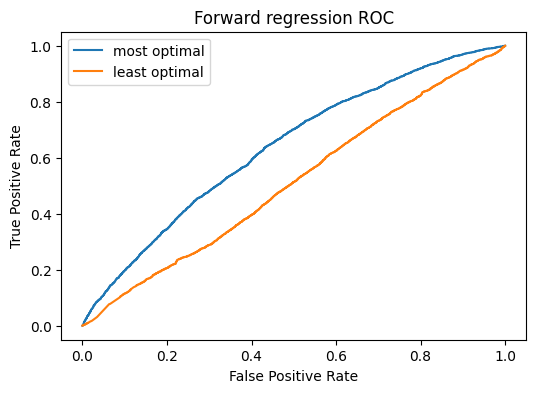

In [59]:
plt.subplots(figsize=(6,4))
plot_roc(X[for_model_cols[0]],y.astype(int),train_size=0.5,label='most optimal')
plot_roc(X[for_model_cols[20]],y.astype(int),train_size=0.5,label='least optimal')

plt.title('Forward regression ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [61]:
for_model_cols[0]

['PAY_0',
 'BILL_AMT1',
 'PAY_2',
 'AGE',
 'PAY_5',
 'PAY_AMT1',
 'LIMIT_BAL',
 'EDUCATION',
 'BILL_AMT2',
 'SEX',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT6',
 'PAY_4']

In [64]:
for_model_cols[5]

['PAY_0',
 'BILL_AMT1',
 'PAY_2',
 'AGE',
 'PAY_5',
 'PAY_AMT1',
 'LIMIT_BAL',
 'EDUCATION',
 'BILL_AMT2',
 'SEX',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT6',
 'PAY_4',
 'BILL_AMT3',
 'PAY_6',
 'PAY_AMT3',
 'BILL_AMT4']

In [62]:
for_model_cols[20]

['PAY_0', 'BILL_AMT1', 'PAY_2']

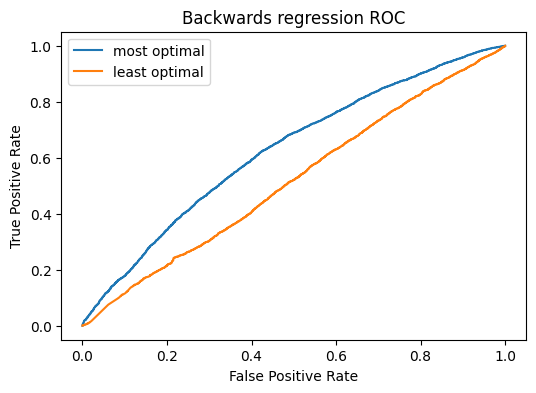

In [65]:
plt.subplots(figsize=(6,4))
plot_roc(X[back_model_cols[0]],y.astype(int),train_size=0.5,label='most optimal')
plot_roc(X[back_model_cols[20]],y.astype(int),train_size=0.5,label='least optimal')

plt.title('Backwards regression ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [66]:
back_model_cols[0]

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_3',
 'PAY_5',
 'BILL_AMT1',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT5']

In [68]:
back_model_cols[19]

['PAY_0', 'PAY_3', 'BILL_AMT1']